# Pandas

Pandas tries to bring the conciseness of R to python.
Dataframes are also numpy arrays, so you can often use these interchangeably.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from subprocess import call

Pandas dataframes support a lot of different options for loading data. For most tutorials and kaggle competitions, data is given in the form of CSV's.

I used this dataset for this presentation:

https://www.kaggle.com/thegurus/spanish-high-speed-rail-system-ticket-pricing

In [2]:
df = pd.read_csv('/root/datasets/spanish-high-speed-rail-system-ticket-pricing/renfe.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Pandas supports quite a few read options, including json, html, and even the clipboard.

df is commonly the shorthand name used for the "DataFrame" in a lot of tutorials. It's not a very good name, but I see it used a lot.

The describe keyword will give out statistics on non-categorical columns.

In [3]:
df.describe()

,price
count,2.269090e+06
mean,6.338550e+01
std,2.578319e+01
min,1.545000e+01
25%,4.375000e+01
50%,6.030000e+01
75%,7.880000e+01
max,2.142000e+02


head can be used to see the first few rows of data (5 by default).

In [4]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


df.info() will get you more info on the dataframe. Including column types on all columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579771 entries, 0 to 2579770
Data columns (total 9 columns):
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), object(8)
memory usage: 196.8+ MB


You can do lots of really neat stuff with pandas to ask most questions you can think of for a dataframe. For example, to see all the places these trains can be coming from, you can write this.

In [6]:
df.origin.unique()

array(['MADRID', 'SEVILLA', 'PONFERRADA', 'BARCELONA', 'VALENCIA'],
      dtype=object)

In [7]:
df['origin'].unique()

array(['MADRID', 'SEVILLA', 'PONFERRADA', 'BARCELONA', 'VALENCIA'],
      dtype=object)

In this data, it turns out we don't care about all these columns, to reduce things down to the columns you care about, you can do this:

In [8]:
features = ['origin', 'destination', 'start_date', 'end_date', 'train_type', 'train_class', 'fare']
target = ['price']
df_reduced = df[features + target]

In [9]:
df_reduced.head()

,origin,destination,start_date,end_date,train_type,train_class,fare,price
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,Turista,Promo,38.55
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,Turista,Promo,53.40
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,Turista,Promo,47.30
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,Preferente,Promo,69.40
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,Turista,Promo,NaN


In [10]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579771 entries, 0 to 2579770
Data columns (total 8 columns):
origin         object
destination    object
start_date     object
end_date       object
train_type     object
train_class    object
fare           object
price          float64
dtypes: float64(1), object(7)
memory usage: 177.1+ MB


I happen to have learned that data was often collected many more times than once, and that, after removing collection time, there are going to be mostly duplicates in this dataset. Pandas has an easy method for me right away.

In [11]:
df_reduced = df_reduced.drop_duplicates()

In [12]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33847 entries, 0 to 2575305
Data columns (total 8 columns):
origin         33847 non-null object
destination    33847 non-null object
start_date     33847 non-null object
end_date       33847 non-null object
train_type     33847 non-null object
train_class    33503 non-null object
fare           33503 non-null object
price          24885 non-null float64
dtypes: float64(1), object(7)
memory usage: 2.3+ MB


Let's look for null values now.  It looks like there's quite a few. This is still just an intro so we'll jsut drop all these.

In [13]:
df_reduced.isna().sum()

origin            0
destination       0
start_date        0
end_date          0
train_type        0
train_class     344
fare            344
price          8962
dtype: int64

In [14]:
df_reduced = df_reduced.dropna()

In [15]:
df_reduced.isna().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
train_class    0
fare           0
price          0
dtype: int64

In [16]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24885 entries, 0 to 2575305
Data columns (total 8 columns):
origin         24885 non-null object
destination    24885 non-null object
start_date     24885 non-null object
end_date       24885 non-null object
train_type     24885 non-null object
train_class    24885 non-null object
fare           24885 non-null object
price          24885 non-null float64
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


Right now is when in the tutorial they remind you to think about your data.  There is going to be a good deal of time where you are getting familiar with your data. This phase of data science is called 'EDA'.

They don't mention it in the tutorial, but if you are messing with date columns, there's this little '.dt' thing off the end of all series.  For example, we can see that start_date and end_date are actually objects instead of dates. Let's fix that.

In [17]:
df_reduced.start_date = pd.to_datetime(df_reduced.start_date)
df_reduced.end_date = pd.to_datetime(df_reduced.end_date)

We can do lots of cool stuff with the .dt suffix, like detecting the day of the week, lots of stuff. We can feed that back into new columns on our dataframe too.

In [18]:
df_reduced['day_of_week'] = df_reduced.start_date.dt.dayofweek

In [19]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24885 entries, 0 to 2575305
Data columns (total 9 columns):
origin         24885 non-null object
destination    24885 non-null object
start_date     24885 non-null datetime64[ns]
end_date       24885 non-null datetime64[ns]
train_type     24885 non-null object
train_class    24885 non-null object
fare           24885 non-null object
price          24885 non-null float64
day_of_week    24885 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 1.9+ MB


Since i don't care what row into the original csv file the row i'm looking at came from, I'm going to reset the index and drop the old one.

In [20]:
df_reduced = df_reduced.reset_index(drop=True)
df_reduced.head()

,origin,destination,start_date,end_date,train_type,train_class,fare,price,day_of_week
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,Turista,Promo,38.55,2
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,Turista,Promo,53.40,2
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,Turista,Promo,47.30,2
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,Preferente,Promo,69.40,2
4,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,Turista,Promo,60.30,2


# Finding rows in Pandas

This probably feels pretty magical, but it's still all valid python. The R people are probably pretty used to this. Pandas really likes working with things at scale across the dataset. Let's find all rows that are going from BARCELONA to MADRID. This is usually how you'll pull rows from a pandas dataframe.

In [21]:
df_barcelona_madrid = df_reduced[(df_reduced.origin == 'BARCELONA') & (df_reduced.destination == 'MADRID')]
df_barcelona_madrid.head()

,origin,destination,start_date,end_date,train_type,train_class,fare,price,day_of_week
1626,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,Turista,Promo,49.55,3
1627,BARCELONA,MADRID,2019-04-25 06:05:00,2019-04-25 09:15:00,AVE,Turista Plus,Promo,80.15,3
1628,BARCELONA,MADRID,2019-04-25 06:25:00,2019-04-25 08:55:00,AVE,Turista,Promo,88.95,3
1629,BARCELONA,MADRID,2019-04-25 06:40:00,2019-04-25 09:25:00,AVE,Turista Plus,Promo,90.50,3
1630,BARCELONA,MADRID,2019-04-25 07:00:00,2019-04-25 09:30:00,AVE,Turista,Flexible,127.10,3


Under the covers, those boolean operations are becoming Series objects, which are what each of the columns of a dataframe are. The bitwise and (&) has been overridden to work as a logical and:

In [22]:
((df_reduced.destination == 'MADRID') & (df_reduced.origin == 'BARCELONA' )).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Those booleans then feed in and filter out rows where the expression is false, leaving a data frame with only the True rows in it. The dataframe will filter this way for anything returing a collection of booleans. For example:

In [23]:
df_reduced[[x in (4,5,6) for x in range(len(df_reduced))]]

,origin,destination,start_date,end_date,train_type,train_class,fare,price,day_of_week
4,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,Turista,Promo,60.3,2
5,MADRID,SEVILLA,2019-05-29 09:45:00,2019-05-29 12:27:00,INTERCITY,Turista,Flexible,62.2,2
6,MADRID,SEVILLA,2019-05-29 10:00:00,2019-05-29 12:32:00,AVE,Turista,Promo,47.3,2


Yes, this makes the array operator horribly overloaded, because this works completely differently:

In [24]:
df_reduced[['price', 'day_of_week']].head()

,price,day_of_week
0,38.55,2
1,53.40,2
2,47.30,2
3,69.40,2
4,60.30,2


Just go with it. It actually is rarely confusing for the reader.

# Getting specific locations

You can iterate over the rows as well, and if you need a specific row, you can use the 'iloc' function and pull it out by row index.

In [25]:
for origin in df_barcelona_madrid['origin'].unique():
    print(origin)

BARCELONA


In [26]:
df_barcelona_madrid['origin'].unique()[0]

'BARCELONA'

iloc is the accessor for just grabbing "row x" from the dataset.

In [27]:
df_barcelona_madrid.iloc[1]

origin                   BARCELONA
destination                 MADRID
start_date     2019-04-25 06:05:00
end_date       2019-04-25 09:15:00
train_type                     AVE
train_class           Turista Plus
fare                         Promo
price                        80.15
day_of_week                      3
Name: 1627, dtype: object

loc is the accessor for grabbing a row by the index it's using. You can see the index via the ".index" field.

In [28]:
df_barcelona_madrid.index

Int64Index([ 1626,  1627,  1628,  1629,  1630,  1631,  1632,  1633,  1634,
             1635,
            ...
            24827, 24861, 24862, 24863, 24864, 24865, 24866, 24867, 24868,
            24869],
           dtype='int64', length=5680)

These two pull back the same row.

In [29]:
df_barcelona_madrid.loc[1626], df_barcelona_madrid.iloc[0]

(origin                   BARCELONA
 destination                 MADRID
 start_date     2019-04-25 05:50:00
 end_date       2019-04-25 08:20:00
 train_type                     AVE
 train_class                Turista
 fare                         Promo
 price                        49.55
 day_of_week                      3
 Name: 1626, dtype: object, origin                   BARCELONA
 destination                 MADRID
 start_date     2019-04-25 05:50:00
 end_date       2019-04-25 08:20:00
 train_type                     AVE
 train_class                Turista
 fare                         Promo
 price                        49.55
 day_of_week                      3
 Name: 1626, dtype: object)

Messing with these series can sometimes get weird, depending on your indexing schemes.  One thing to note, all these methods are making leaving the original dataset intact. If you want to actually change the original dataset, a lot of these operations have an in_place=True parameter that can be given.

In [30]:
df_barcelona_madrid.groupby('day_of_week').describe().loc[5]

price  count    606.000000
       mean      83.100396
       std       23.128094
       min       38.800000
       25%       67.240000
       50%       80.150000
       75%       98.000000
       max      181.500000
Name: 5, dtype: float64

In [31]:
df_barcelona_madrid.groupby(['train_type','train_class']).describe()

price                                               \
                          count        mean        std    min    25%     50%   
train_type train_class                                                         
AVE        Preferente     942.0  122.911019  38.918866  53.20  98.00  112.55   
           Turista       2979.0   84.189070  18.641292  40.95  68.65   85.10   
           Turista Plus  1405.0   88.585174  21.175557  38.80  80.15   90.50   
AVE-TGV    Preferente      33.0  134.810606  38.119421  68.95  98.00  127.05   
           Turista        181.0   71.867901  21.174658  32.30  58.15   66.75   
           Turista Plus    56.0   95.166071  17.779613  69.80  80.15   90.50   
R. EXPRES  Turista         84.0   43.250000   0.000000  43.25  43.25   43.25   

                                        day_of_week                           \
                            75%     max       count      mean       std  min   
train_type train_class                                                         
AVE        Preferente    143.40  214.20       942.0  3.014862  2.121143  0.0   
           Turista       100.40  127.10      2979.0  2.748909  1.960848  0.0   
           Turista Plus  102.15  152.50      1405.0  2.929537  1.944388  0.0   
AVE-TGV    Preferente    181.50  181.50        33.0  3.909091  1.738599  0.0   
           Turista        85.10  107.70       181.0  3.022099  2.046558  0.0   
           Turista Plus  102.15  129.30        56.0  3.142857  1.967265  0.0   
R. EXPRES  Turista        43.25   43.25        84.0  3.000000  2.012012  0.0   

                                              
                          25%  50%  75%  max  
train_type train_class                        
AVE        Preferente    1.00  3.0  5.0  6.0  
           Turista       1.00  3.0  4.0  6.0  
           Turista Plus  1.00  3.0  4.0  6.0  
AVE-TGV    Preferente    3.00  4.0  5.0  6.0  
           Turista       1.00  3.0  5.0  6.0  
           Turista Plus  1.75  3.0  5.0  6.0  
R. EXPRES  Turista       1.00  3.0  5.0  6.0

In [32]:
df_barcelona_madrid.groupby(['train_type','train_class']).describe().loc[('AVE','Turista')]['price']['50%']

85.1

# Plotting

Pandas uses matplotlib under the covers, and, like everything else, it can do a ton right out of the box.
Let's see what prices look like for that based on the day of the week.

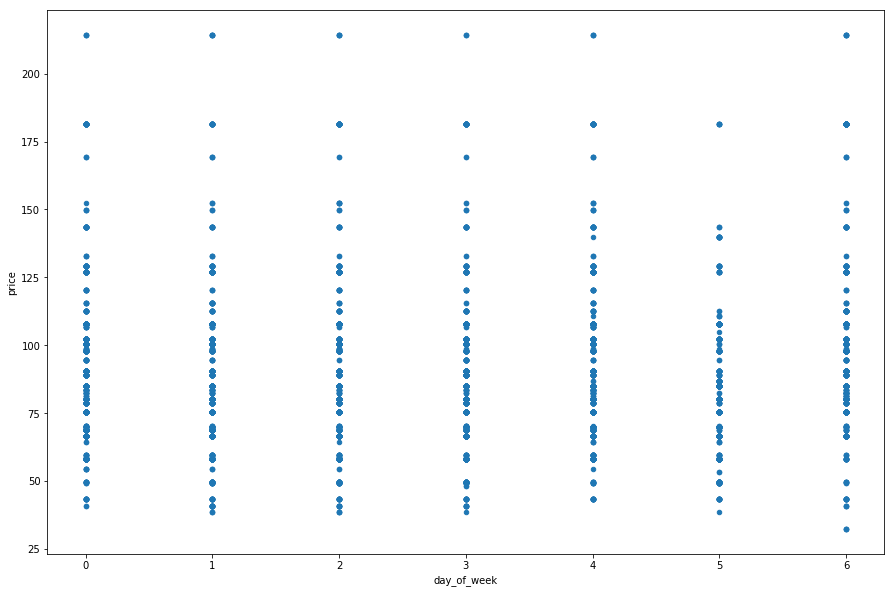

In [33]:
df_barcelona_madrid.plot.scatter(x='day_of_week', y='price', figsize=(15,10))

Well, that's interesting, prices are basically all over the place. It might be a good idea to look at these across days of the week with a more interesting plot.

In [34]:
df_barcelona_madrid.groupby('day_of_week')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,891.0,92.718114,28.039138,40.95,75.40,85.10,107.70,214.2
1,872.0,88.349656,28.870093,38.80,68.65,85.10,102.15,214.2
2,813.0,90.154945,30.183114,38.80,68.95,85.10,102.15,214.2
3,819.0,89.492149,28.192135,38.80,69.80,85.10,102.15,214.2
4,905.0,93.182950,27.492131,43.25,75.40,86.80,106.75,214.2
5,606.0,83.100396,23.128094,38.80,67.24,80.15,98.00,181.5
6,774.0,98.876667,30.903659,32.30,80.15,90.50,107.70,214.2


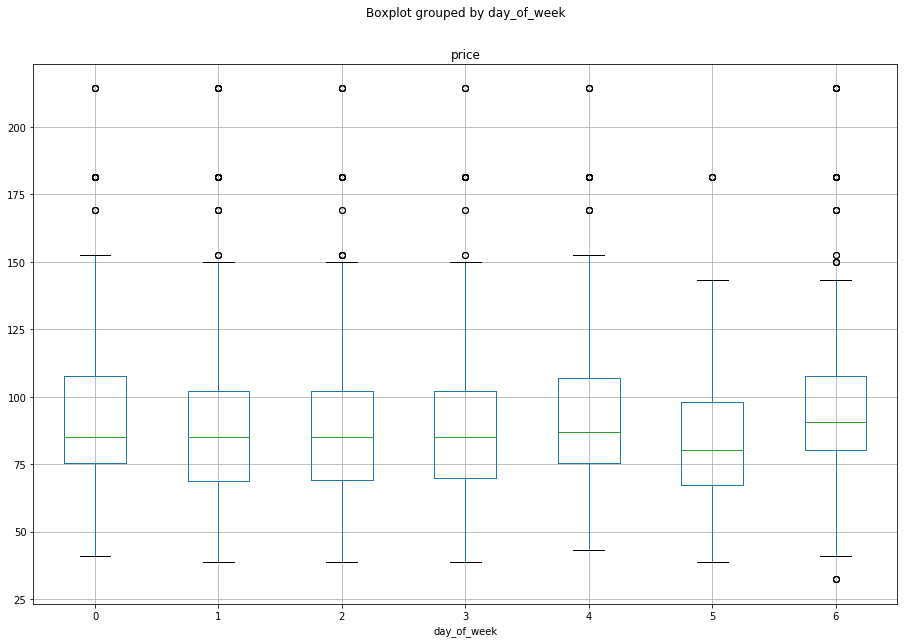

In [35]:
df_barcelona_madrid.boxplot(column=['price'], by='day_of_week', figsize=(15, 10))

# Decision Trees

Decision trees are a pretty simple concept. The idea is to make a tree where, at each node, you evaluate a feature to categorize a sample. This isn't just for categorization, though. It is also for regression. Although, in a way, with decision trees, regression is just categorization. Since it still goes down to a leaf node. The category is just its estimated value.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The lab already had numerical values that were used for estimation. Our values are categorical still. In order to use these columns, we will need to convert them to numbers. Because converting to just numbers isn't good enough, it's probably a good idea to one-hot encode these as well, so that way we aren't accidentally suggesting proximity between two categories.

In [37]:
cat_cols = ['origin', 'destination', 'train_type', 'train_class', 'fare', 'day_of_week']
X = pd.get_dummies(df_reduced[cat_cols])
y = df_reduced[target]

In [38]:

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [39]:
train_X.shape, train_y.shape

((18663, 39), (18663, 1))

In [40]:
??DecisionTreeRegressor

In [41]:
best_leaf_nodes = 1
best_mse = -1

# We'll try out a few options
for max_leaf_nodes in [10, 20, 50, 100, 150, 250, 300, 350, 500, 1000]:
    tree_regressor = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1, criterion='mse')
    tree_regressor.fit(train_X, train_y)
    mse = mean_squared_error(tree_regressor.predict(val_X), val_y)
    if best_mse < 0 or best_mse > mse:
        best_mse = mse
        best_leaf_nodes = max_leaf_nodes
        
tree_regressor = DecisionTreeRegressor(max_leaf_nodes=best_leaf_nodes, random_state=1)
tree_regressor.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=250, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [42]:
with open('decision-tree.dot', 'w') as dotfile:
    export_graphviz(tree_regressor, out_file=dotfile)
    call(['dot', '-Tpdf', 'decision-tree.dot', '-o', 'decision-tree.pdf'])

That's pretty cool! We've got a decision tree. It's not so cool that the columns didn't stay labeled, but hey! Check this out, we can find out what the column was by using X.columns. The top column was 28 I think. This means that splitting by this class was found to be the action that had the most discriminating effect on the sample. With a regression tree, this uses whatever feature or features reduces the squared error of both sides the most. 

In [43]:
X.columns[33], X.columns[28], X.columns[6]

('fare_Flexible', 'train_class_Preferente', 'destination_BARCELONA')

Well, not going to lie, this tree is complex, and, I can't tell at first glance how it got to what it got. Let's see how this does on our validation set.

In [44]:
np.sqrt(mean_squared_error(tree_regressor.predict(train_X), train_y)), train_y['price'].mean()

(12.29766424744311, 72.49336066012967)

In [45]:
np.sqrt(mean_squared_error(tree_regressor.predict(val_X), val_y)), val_y['price'].mean()

(12.484849581974117, 72.01083574413371)

Well cool. This means our predictor has a standard deviation of about 12.49 euros. Given a mean of 72.01, that's not horrible. 2 Standard deviations is like 25 euros, which isn't great, either. 2 standard deviations are often kind of considered the range of how wrong your model is because that roughly lines up with the 95% confidence interval.

In [46]:
y_hat = tree_regressor.predict(val_X).reshape(-1, 1)
results = pd.DataFrame(
    np.concatenate([y_hat, val_y, (y_hat - val_y), (y_hat-val_y) **2], axis=1),
    columns=['y_hat', 'y', 'err', 'se'])
results.head()

,y_hat,y,err,se
0,85.813019,102.15,-16.336981,266.896953
1,78.991672,75.40,3.591672,12.900111
2,79.156426,100.40,-21.243574,451.289431
3,110.480870,98.00,12.480870,155.772105
4,57.018644,40.30,16.718644,279.513059


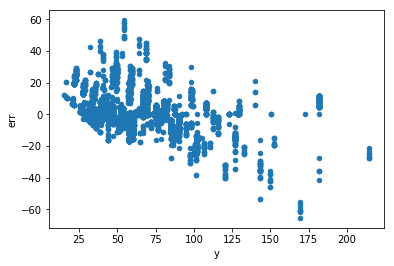

In [47]:
results.plot.scatter(x='y',y='err')

Based on that graph, I can tell that our current estimator is overestimating some values and underestimating some others. We can even find the N worst samples and see if anything stands out about them.

In [48]:
n_worst = results.sort_values(by='se').tail(10)
n_worst

,y_hat,y,err,se
5246,112.385050,54.45,57.935050,3356.469961
4978,112.385050,54.45,57.935050,3356.469961
829,110.480870,169.20,-58.719130,3447.936279
211,113.902885,54.45,59.452885,3534.645489
5120,108.928298,169.20,-60.271702,3632.678077
1354,108.248333,169.20,-60.951667,3715.105669
3127,108.248333,169.20,-60.951667,3715.105669
5172,108.248333,169.20,-60.951667,3715.105669
4499,107.605523,169.20,-61.594477,3793.879565
3556,103.674098,169.20,-65.525902,4293.643786


And here are the values for these. The row selection here is pretty gnarly. Basically, the results dataframe isn't indexed by the original rows the way val_y is. It's just indexed with the rows from val_y. the iloc locator just pulls back "row X" while the loc locator pulls back "index X", represented by the bold number on the right.

In [49]:
df_reduced.loc[val_y.iloc[n_worst.index].index]

,origin,destination,start_date,end_date,train_type,train_class,fare,price,day_of_week
16348,MADRID,BARCELONA,2019-06-04 20:30:00,2019-06-04 23:40:00,AVE,Preferente,Promo,54.45,1
15873,MADRID,BARCELONA,2019-06-25 20:30:00,2019-06-25 23:40:00,AVE,Preferente,Promo,54.45,1
9931,BARCELONA,MADRID,2019-04-25 07:40:00,2019-04-25 10:10:00,AVE,Preferente,Promo,169.20,3
21768,MADRID,BARCELONA,2019-05-05 06:20:00,2019-05-05 09:29:00,AVE,Preferente,Promo,54.45,6
8755,MADRID,BARCELONA,2019-04-24 20:00:00,2019-04-24 22:30:00,AVE,Preferente,Promo,169.20,2
22101,MADRID,BARCELONA,2019-04-12 17:00:00,2019-04-12 19:30:00,AVE,Preferente,Promo,169.20,4
22327,MADRID,BARCELONA,2019-04-12 19:00:00,2019-04-12 21:30:00,AVE,Preferente,Promo,169.20,4
8780,MADRID,BARCELONA,2019-04-26 19:00:00,2019-04-26 21:30:00,AVE,Preferente,Promo,169.20,4
14721,BARCELONA,MADRID,2019-05-07 19:25:00,2019-05-07 21:55:00,AVE,Preferente,Promo,169.20,1
24653,MADRID,BARCELONA,2019-04-22 14:00:00,2019-04-22 16:30:00,AVE,Preferente,Promo,169.20,0


Obviously, the way that decision trees are used in this tutorial is more of a "throw the tree library at it". If you're interested in how decision trees determine what to separate things by, check out this youtube video (and lots of others by that channel).

* (Part 1) https://www.youtube.com/watch?v=7VeUPuFGJHk
* (Part 2) https://www.youtube.com/watch?v=wpNl-JwwplA

(Seriously, watch this channel's videos. They're excellent).

# Random Forests

Decision trees sort of have an obvious flaw: they're classifying by a single column, and they're prone to overfitting. Ours didn't overfit too much, but we were using the defaults.

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
random_forest = RandomForestRegressor(random_state=1, n_estimators=10, max_leaf_nodes=250)

In [52]:
random_forest.fit(train_X, train_y.to_numpy().reshape(-1))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=250,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [53]:
np.sqrt(mean_squared_error(random_forest.predict(train_X), train_y)), train_y['price'].mean()

(12.304297846516212, 72.49336066012967)

In [54]:
np.sqrt(mean_squared_error(random_forest.predict(val_X), val_y)), val_y['price'].mean()

(12.47868589553467, 72.01083574413371)

In [55]:
y_hat_rf = random_forest.predict(val_X).reshape(-1, 1)
results_rf = pd.DataFrame(
    np.concatenate([y_hat_rf, val_y, (y_hat_rf - val_y), (y_hat_rf - val_y) **2], axis=1),
    columns=['y_hat', 'y', 'err', 'se'])
results_rf.head()

,y_hat,y,err,se
0,86.386641,102.15,-15.763359,248.483477
1,79.462670,75.40,4.062670,16.505290
2,78.887631,100.40,-21.512369,462.782018
3,109.254509,98.00,11.254509,126.663984
4,56.764264,40.30,16.464264,271.071980


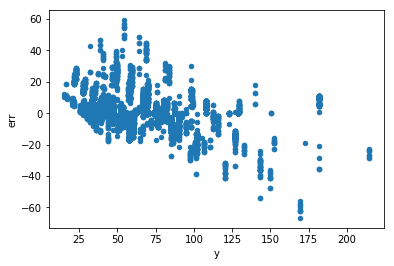

In [56]:
results_rf.plot.scatter(x='y',y='err')

In [57]:
n_worst_rf = results.sort_values(by='se').tail(10)
n_worst_rf

,y_hat,y,err,se
5246,112.385050,54.45,57.935050,3356.469961
4978,112.385050,54.45,57.935050,3356.469961
829,110.480870,169.20,-58.719130,3447.936279
211,113.902885,54.45,59.452885,3534.645489
5120,108.928298,169.20,-60.271702,3632.678077
1354,108.248333,169.20,-60.951667,3715.105669
3127,108.248333,169.20,-60.951667,3715.105669
5172,108.248333,169.20,-60.951667,3715.105669
4499,107.605523,169.20,-61.594477,3793.879565
3556,103.674098,169.20,-65.525902,4293.643786


In [58]:
df_reduced.loc[val_y.iloc[n_worst_rf.index].index]

,origin,destination,start_date,end_date,train_type,train_class,fare,price,day_of_week
16348,MADRID,BARCELONA,2019-06-04 20:30:00,2019-06-04 23:40:00,AVE,Preferente,Promo,54.45,1
15873,MADRID,BARCELONA,2019-06-25 20:30:00,2019-06-25 23:40:00,AVE,Preferente,Promo,54.45,1
9931,BARCELONA,MADRID,2019-04-25 07:40:00,2019-04-25 10:10:00,AVE,Preferente,Promo,169.20,3
21768,MADRID,BARCELONA,2019-05-05 06:20:00,2019-05-05 09:29:00,AVE,Preferente,Promo,54.45,6
8755,MADRID,BARCELONA,2019-04-24 20:00:00,2019-04-24 22:30:00,AVE,Preferente,Promo,169.20,2
22101,MADRID,BARCELONA,2019-04-12 17:00:00,2019-04-12 19:30:00,AVE,Preferente,Promo,169.20,4
22327,MADRID,BARCELONA,2019-04-12 19:00:00,2019-04-12 21:30:00,AVE,Preferente,Promo,169.20,4
8780,MADRID,BARCELONA,2019-04-26 19:00:00,2019-04-26 21:30:00,AVE,Preferente,Promo,169.20,4
14721,BARCELONA,MADRID,2019-05-07 19:25:00,2019-05-07 21:55:00,AVE,Preferente,Promo,169.20,1
24653,MADRID,BARCELONA,2019-04-22 14:00:00,2019-04-22 16:30:00,AVE,Preferente,Promo,169.20,0


In [59]:
for idx, x in enumerate(random_forest.estimators_, 0):
    with open(f'random-forest-{idx}.dot', 'w') as dotfile:
        export_graphviz(x, out_file=dotfile)
    call(['dot', '-Tpdf', f'random-forest-{idx}.dot', '-o', f'random-forest-{idx}.pdf'])

Random forests are also taken as a given, but there are some great videos here too.

* (Part 1) https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
* (Part 2) https://www.youtube.com/watch?v=nyxTdL_4Q-Q

Random Forests are just an ensemble of decision trees that utilize a random "bootstrap" dataset (A same-sized, but randomly selected subset of the data (rows may repeat)), and a random subset of columns to classify on for each tree.

The trees then get together and either vote or have their estimates averaged together for determining their results. The combination of bootstrapping the data, and aggregating the estimates of the individual models is called "bagging".

**B**ootstrap **Agg**regation (ing)

# Boosting

There's another ensemble technique called "boosting", it's much more directed than bagging, by building models that compensate for the problems of the model made before it. It is usually a lot more effective. I think this gets covered later, but I thought I'd mention it now.